In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 321.2 kB/s eta 0:00:00


In [ ]:
pip install scikit-learn==0.18 --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects


In [ ]:
import    numpy                   as     np
import    pandas                  as     pd
import    matplotlib.pyplot       as     plt
from      sklearn.preprocessing   import LabelEncoder
import    category_encoders       as     ce
from      seaborn                 import heatmap
import    seaborn                 as     sns
from      sklearn.neighbors       import LocalOutlierFactor
from      sklearn.model_selection import train_test_split , GridSearchCV
from      sklearn.preprocessing   import StandardScaler , MinMaxScaler
from      sklearn.metrics         import accuracy_score, confusion_matrix, f1_score, recall_score , precision_score
import    lightgbm
from      imblearn.under_sampling import RandomUnderSampler
from      imblearn.over_sampling  import RandomOverSampler , SMOTE
import    seaborn
from      sklearn.linear_model    import LogisticRegression
from      sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from      mlxtend.classifier      import EnsembleVoteClassifier, StackingCVClassifier
from      sklearn.neural_network  import MLPClassifier

In [ ]:
Fta_df=pd.read_csv(r'/content/drive/MyDrive/insurance project/Train.csv')

In [ ]:
Fta_df.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3.6_months_late,Count_6.12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
2,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
3,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1
4,1.000,24829,118400,0.0,0.0,0.0,99.05,11,B,Urban,7500,1


In [ ]:
Fta_df.isnull().sum()

perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3.6_months_late                 64
Count_6.12_months_late                64
Count_more_than_12_months_late        64
application_underwriting_score      1976
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
renewal                                0
dtype: int64

In [ ]:
Fta_df['renewal'].value_counts()

1    49933
0     3303
Name: renewal, dtype: int64

In [ ]:
Encoder1=ce.TargetEncoder()
Encoder2=ce.OneHotEncoder()

In [ ]:
df=pd.get_dummies(Fta_df,drop_first=True)
#df=Fta_df

<Axes: >

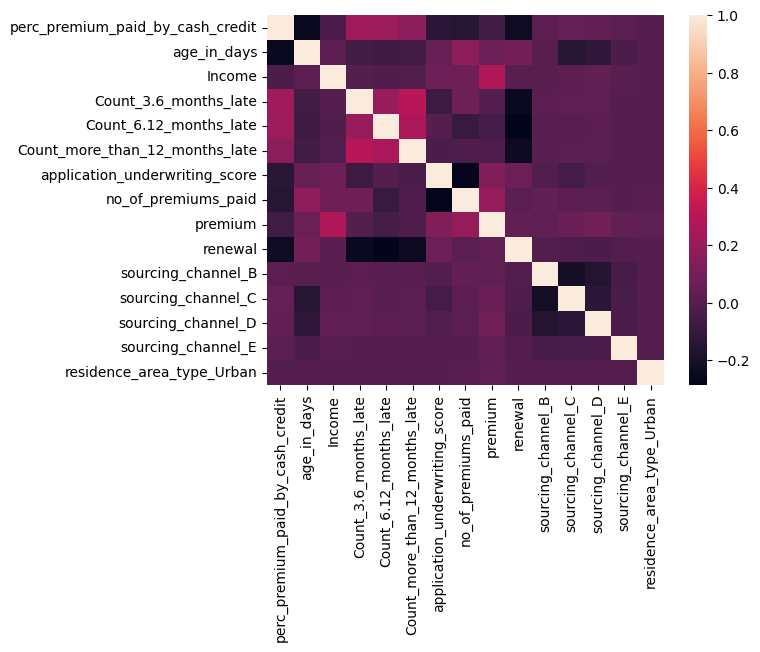

In [ ]:
cor=df.corr()
heatmap(cor)

In [ ]:
df2 = df.drop(['Count_3.6_months_late','Count_6.12_months_late','Count_more_than_12_months_late'],axis=1)
df2['application_underwriting_score'] = df2['application_underwriting_score'].fillna(df2['application_underwriting_score'].median())


In [ ]:
df.isnull().sum()


perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3.6_months_late                 64
Count_6.12_months_late                64
Count_more_than_12_months_late        64
application_underwriting_score      1976
no_of_premiums_paid                    0
premium                                0
renewal                                0
sourcing_channel_B                     0
sourcing_channel_C                     0
sourcing_channel_D                     0
sourcing_channel_E                     0
residence_area_type_Urban              0
dtype: int64

In [ ]:
#sns.pairplot(df)

In [ ]:
df2.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,application_underwriting_score,no_of_premiums_paid,premium,renewal,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban
0,0.429,12058,355060,99.02,13,3300,1,0,1,0,0,1
1,0.917,17531,84140,98.69,7,3300,0,0,1,0,0,0
2,0.049,15341,250510,99.57,9,9600,1,0,0,0,0,1
3,0.052,31400,198680,99.87,12,9600,1,1,0,0,0,1
4,1.000,24829,118400,99.05,11,7500,1,1,0,0,0,1


In [ ]:
type(df2['perc_premium_paid_by_cash_credit'][2])

numpy.float64

In [ ]:
df3 = df2.copy()

In [ ]:
df2[df2['premium']>24.5]=0

In [ ]:
df3.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,application_underwriting_score,no_of_premiums_paid,premium,renewal,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban
0,0.429,12058,355060,99.02,13,3300,1,0,1,0,0,1
1,0.917,17531,84140,98.69,7,3300,0,0,1,0,0,0
2,0.049,15341,250510,99.57,9,9600,1,0,0,0,0,1
3,0.052,31400,198680,99.87,12,9600,1,1,0,0,0,1
4,1.000,24829,118400,99.05,11,7500,1,1,0,0,0,1


In [ ]:
df2['perc_premium_paid_by_cash_credit'].value_counts()

0.0    53236
Name: perc_premium_paid_by_cash_credit, dtype: int64

In [ ]:
for column in df2.columns :
  print(column)
  if column not in ['renewal' , 'sourcing_channel',	'residence_area_type']:
    median=int(df2[column].median())
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Up=Q3+1.5*IQR
    Down=Q1-1.5*IQR
    outliers=df2[(df2[column]>Up)|(df2[column]<Down)]
    if column != 'perc_premium_paid_by_cash_credit':
      df3[column][(df3[column]>Up)]=Up
      df3[column][(df3[column]<Down)]=Down
  else:
    continue



perc_premium_paid_by_cash_credit
age_in_days
Income
application_underwriting_score
no_of_premiums_paid
premium
renewal
sourcing_channel_B
sourcing_channel_C
sourcing_channel_D
sourcing_channel_E
residence_area_type_Urban


<ipython-input-20-ff9889e217f1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[column][(df3[column]>Up)]=Up
<ipython-input-20-ff9889e217f1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[column][(df3[column]<Down)]=Down
<ipython-input-20-ff9889e217f1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[column][(df3[column]>Up)]=Up
<ipython-input-20-ff9889e217f1>:13: SettingWithCopyWarning: 
A value is trying to be set o

In [ ]:
df3['renewal'].value_counts()

1    49933
0     3303
Name: renewal, dtype: int64

In [ ]:
df3.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,application_underwriting_score,no_of_premiums_paid,premium,renewal,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban
0,0.429,12058,355060,99.02,13.0,3300,1,0,0,0,0,1
1,0.917,17531,84140,98.69,7.0,3300,0,0,0,0,0,0
2,0.049,15341,250510,99.57,9.0,9600,1,0,0,0,0,1
3,0.052,31400,198680,99.87,12.0,9600,1,0,0,0,0,1
4,1.000,24829,118400,99.05,11.0,7500,1,0,0,0,0,1


In [ ]:
type(df2['renewal'])

pandas.core.series.Series

In [ ]:
outliers

,perc_premium_paid_by_cash_credit,age_in_days,Income,application_underwriting_score,no_of_premiums_paid,premium,renewal,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban


In [ ]:
df3['renewal'].value_counts()

1    49933
0     3303
Name: renewal, dtype: int64

In [ ]:
dfc = df3.copy()

In [ ]:
numerical_columns = ['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'application_underwriting_score', 'no_of_premiums_paid', 'premium']

for i, col1 in enumerate(numerical_columns):
    for j, col2 in enumerate(numerical_columns):
        if i < j:
            new_col_name = f'{col1}_divided_by_{col2}'
            dfc[new_col_name] = dfc[col1] / dfc[col2]

In [ ]:
'''X = df3.drop('renewal',axis=1)
Y = df3     ['renewal']'''
X = dfc.drop('renewal',axis=1)
Y = dfc     ['renewal']

In [ ]:
'''Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=22)
XVtest, XVvalid, YVtest, YVvalid = train_test_split(Xtest, Ytest, test_size=0.5)'''

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=22)
XVtest, XVvalid, YVtest, YVvalid = train_test_split(Xtest, Ytest, test_size=0.5)

In [ ]:
Xtrain.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,application_underwriting_score,no_of_premiums_paid,premium,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,...,age_in_days_divided_by_Income,age_in_days_divided_by_application_underwriting_score,age_in_days_divided_by_no_of_premiums_paid,age_in_days_divided_by_premium,Income_divided_by_application_underwriting_score,Income_divided_by_no_of_premiums_paid,Income_divided_by_premium,application_underwriting_score_divided_by_no_of_premiums_paid,application_underwriting_score_divided_by_premium,no_of_premiums_paid_divided_by_premium
38673,0.012,23002,212560,98.82,18.0,11700,0,0,0,0,...,0.108214,232.766646,1277.888889,1.965983,2150.981583,11808.888889,18.167521,5.490000,0.008446,0.001538
1047,0.031,22271,104020,99.30,10.0,5400,0,0,0,0,...,0.214103,224.279960,2227.100000,4.124259,1047.532729,10402.000000,19.262963,9.930000,0.018389,0.001852
23325,0.133,20090,315080,98.80,21.0,20100,0,0,0,0,...,0.063762,203.340081,956.666667,0.999502,3189.068826,15003.809524,15.675622,4.704762,0.004915,0.001045
13122,0.130,25196,450130,99.86,9.0,22200,0,0,0,0,...,0.055975,252.313239,2799.555556,1.134955,4507.610655,50014.444444,20.276126,11.095556,0.004498,0.000405
11017,0.456,18259,217020,99.04,10.0,22200,0,0,0,0,...,0.084135,184.359855,1825.900000,0.822477,2191.235864,21702.000000,9.775676,9.904000,0.004461,0.000450


In [ ]:
'''Xtrain = Xtrain[['application_underwriting_score','age_in_days_divided_by_no_of_premiums_paid','age_in_days','Income_divided_by_premium','Income_divided_by_no_of_premiums_paid','age_in_days_divided_by_Income','age_in_days_divided_by_premium','application_underwriting_score_divided_by_no_of_premiums_paid','application_underwriting_score_divided_by_premium','perc_premium_paid_by_cash_credit_divided_by_age_in_days','age_in_days_divided_by_application_underwriting_score']]
Xtest=Xtest[['application_underwriting_score','age_in_days_divided_by_no_of_premiums_paid','age_in_days','Income_divided_by_premium','Income_divided_by_no_of_premiums_paid','age_in_days_divided_by_Income','age_in_days_divided_by_premium','application_underwriting_score_divided_by_no_of_premiums_paid','application_underwriting_score_divided_by_premium','perc_premium_paid_by_cash_credit_divided_by_age_in_days','age_in_days_divided_by_application_underwriting_score']]
XVtest=XVtest[['application_underwriting_score','age_in_days_divided_by_no_of_premiums_paid','age_in_days','Income_divided_by_premium','Income_divided_by_no_of_premiums_paid','age_in_days_divided_by_Income','age_in_days_divided_by_premium','application_underwriting_score_divided_by_no_of_premiums_paid','application_underwriting_score_divided_by_premium','perc_premium_paid_by_cash_credit_divided_by_age_in_days','age_in_days_divided_by_application_underwriting_score']]
XVvalid=XVvalid[['application_underwriting_score','age_in_days_divided_by_no_of_premiums_paid','age_in_days','Income_divided_by_premium','Income_divided_by_no_of_premiums_paid','age_in_days_divided_by_Income','age_in_days_divided_by_premium','application_underwriting_score_divided_by_no_of_premiums_paid','application_underwriting_score_divided_by_premium','perc_premium_paid_by_cash_credit_divided_by_age_in_days','age_in_days_divided_by_application_underwriting_score']]'''


"Xtrain = Xtrain[['application_underwriting_score','age_in_days_divided_by_no_of_premiums_paid','age_in_days','Income_divided_by_premium','Income_divided_by_no_of_premiums_paid','age_in_days_divided_by_Income','age_in_days_divided_by_premium','application_underwriting_score_divided_by_no_of_premiums_paid','application_underwriting_score_divided_by_premium','perc_premium_paid_by_cash_credit_divided_by_age_in_days','age_in_days_divided_by_application_underwriting_score']]\nXtest=Xtest[['application_underwriting_score','age_in_days_divided_by_no_of_premiums_paid','age_in_days','Income_divided_by_premium','Income_divided_by_no_of_premiums_paid','age_in_days_divided_by_Income','age_in_days_divided_by_premium','application_underwriting_score_divided_by_no_of_premiums_paid','application_underwriting_score_divided_by_premium','perc_premium_paid_by_cash_credit_divided_by_age_in_days','age_in_days_divided_by_application_underwriting_score']]\nXVtest=XVtest[['application_underwriting_score','age_

In [ ]:
Xtrain.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,application_underwriting_score,no_of_premiums_paid,premium,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,...,age_in_days_divided_by_Income,age_in_days_divided_by_application_underwriting_score,age_in_days_divided_by_no_of_premiums_paid,age_in_days_divided_by_premium,Income_divided_by_application_underwriting_score,Income_divided_by_no_of_premiums_paid,Income_divided_by_premium,application_underwriting_score_divided_by_no_of_premiums_paid,application_underwriting_score_divided_by_premium,no_of_premiums_paid_divided_by_premium
38673,0.012,23002,212560,98.82,18.0,11700,0,0,0,0,...,0.108214,232.766646,1277.888889,1.965983,2150.981583,11808.888889,18.167521,5.490000,0.008446,0.001538
1047,0.031,22271,104020,99.30,10.0,5400,0,0,0,0,...,0.214103,224.279960,2227.100000,4.124259,1047.532729,10402.000000,19.262963,9.930000,0.018389,0.001852
23325,0.133,20090,315080,98.80,21.0,20100,0,0,0,0,...,0.063762,203.340081,956.666667,0.999502,3189.068826,15003.809524,15.675622,4.704762,0.004915,0.001045
13122,0.130,25196,450130,99.86,9.0,22200,0,0,0,0,...,0.055975,252.313239,2799.555556,1.134955,4507.610655,50014.444444,20.276126,11.095556,0.004498,0.000405
11017,0.456,18259,217020,99.04,10.0,22200,0,0,0,0,...,0.084135,184.359855,1825.900000,0.822477,2191.235864,21702.000000,9.775676,9.904000,0.004461,0.000450


In [ ]:
scaler          = MinMaxScaler      ()
Xtrain_scale    = scaler.fit        (Xtrain)
ScaledData      = scaler.transform  (Xtrain)
ScaledTestData  = scaler.transform  (Xtest)
ScaledVTestData = scaler.transform  (XVtest)
ScaledValidData = scaler.transform  (XVvalid)

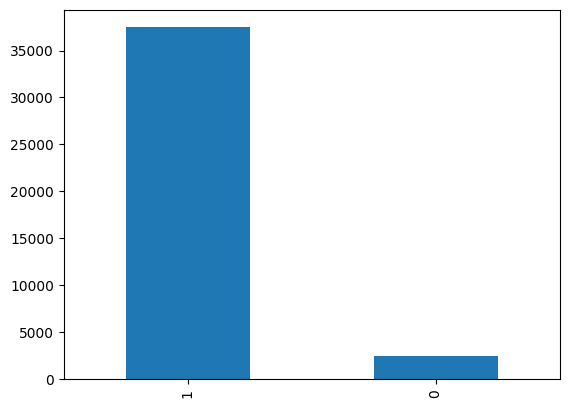

In [ ]:
Ytrain.value_counts().plot.bar()
plt.show()

In [ ]:
Randomundersampler             = RandomUnderSampler(random_state=2000)
Xundersampled , Yundersampled  = Randomundersampler.fit_resample(ScaledData , Ytrain)

In [ ]:
ros                         = RandomOverSampler(random_state=2000)
Xoversampled , Yoversampled = ros.fit_resample(ScaledData , Ytrain)

In [ ]:
smote = SMOTE()
Xsmote, Ysmote = smote.fit_resample(ScaledData, Ytrain)

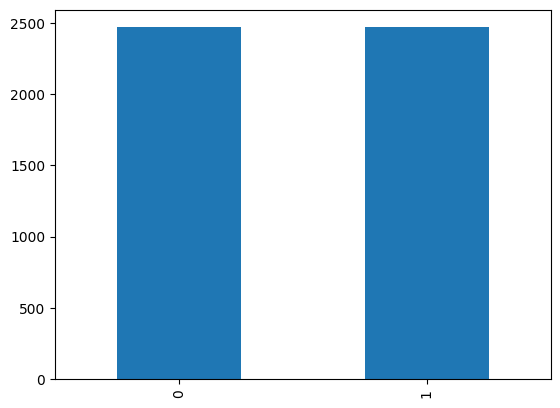

In [ ]:
Yundersampled.value_counts().plot.bar()
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB #1
GNB = GaussianNB()
GNB.fit(Xoversampled, Yoversampled)
pred = GNB.predict(ScaledTestData)
print(confusion_matrix(Ytest, pred))
print('f1',f1_score(pred, Ytest, pos_label=0))

print(f1_score(Ytest, pred))
print(accuracy_score(Ytest, pred))
print(recall_score(Ytest, pred))
print(precision_score(Ytest, pred))

[[  470   365]
 [ 2392 10082]]
f1 0.25426021098187723
0.879717289821561
0.7928469456758584
0.8082411415744749
0.9650617402125012


In [ ]:
MNB = MultinomialNB()
MNB.fit(Xoversampled, Yoversampled)
pred = MNB.predict(ScaledTestData)
print(confusion_matrix(Ytest, pred))
print('f1',f1_score(pred, Ytest, pos_label=0))

print(f1_score(Ytest, pred))
print(accuracy_score(Ytest, pred))
print(recall_score(Ytest, pred))
print(precision_score(Ytest, pred))

[[ 548  287]
 [3243 9231]]
f1 0.2369217466493731
0.8394870862131684
0.7347659478548351
0.74001924001924
0.9698466064299223


In [ ]:
'''from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=10, min_samples_leaf=3,
                            class_weight={1:0.01 , 0:0.99}, random_state=2)

DT.fit(Xoversampled, Yoversampled)
pred = DT.predict(Xtest)
print(confusion_matrix(Ytest, pred))
print('f1',f1_score(pred, Ytest, pos_label=0))

print(f1_score(Ytest, pred))
print(accuracy_score(Ytest, pred))
print(recall_score(Ytest, pred))
print(precision_score(Ytest, pred))'''

"from sklearn.tree import DecisionTreeClassifier\nDT = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=10, min_samples_leaf=3,\n                            class_weight={1:0.01 , 0:0.99}, random_state=2)\n\nDT.fit(Xoversampled, Yoversampled)\npred = DT.predict(Xtest)\nprint(confusion_matrix(Ytest, pred))\nprint('f1',f1_score(pred, Ytest, pos_label=0))\n\nprint(f1_score(Ytest, pred))\nprint(accuracy_score(Ytest, pred))\nprint(recall_score(Ytest, pred))\nprint(precision_score(Ytest, pred))"

In [ ]:
import xgboost

XGB = xgboost.XGBClassifier(random_state=2020, n_estimators=2000, max_depth=6, colsample_bytree=0.85, missing=1,early_stopping=10,
                            scale_pos_weight=0.1, learning_rate=0.02, reg_alpha=2.01, reg_lambda=0.05, verbosity=1)
param_grid = {
    'n_estimators': [1000, 2000, 3000],
    'max_depth': [4, 6, 8],
    'colsample_bytree': [0.8, 0.85, 0.9],
    'learning_rate': [0.01, 0.02, 0.05],
    'reg_alpha': [0.01, 1, 2],
    'reg_lambda': [0.01, 0.05, 0.1],
}

XGB.fit(ScaledData, Ytrain, eval_set=[(ScaledData, Ytrain),(ScaledValidData, YVvalid)], verbose=2, early_stopping_rounds=10)
pred = XGB.predict(ScaledVTestData)
print(confusion_matrix(YVtest, pred))
print('f1',f1_score(pred, YVtest, pos_label=0))

print(f1_score(YVtest, pred))
print(accuracy_score(YVtest, pred))
print(recall_score(YVtest, pred))
print(precision_score(YVtest, pred))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19:02:04] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.

[0]	validation_0-logloss:0.68573	validation_1-logloss:0.68586
[2]	validation_0-logloss:0.67165	validation_1-logloss:0.67211
[4]	validation_0-logloss:0.65859	validation_1-logloss:0.65930
[6]	validation_0-logloss:0.64631	validation_1-logloss:0.64728
[8]	validation_0-logloss:0.63483	validation_1-logloss:0.63604
[10]	validation_0-logloss:0.62411	validation_1-logloss:0.62557
[12]	validation_0-logloss:0.61402	validation_1-logloss:0.61578
[14]	validation_0-logloss:0.60450	validation_1-logloss:0.60648
[16]	validation_0-logloss:0.59547	validation_1-logloss:0.59760
[18]	validation_0-logloss:0.58704	validation_1-logloss:0.58937
[20]	validation_0-logloss:0.57901	validation_1-logloss:0.58166
[22]	validation_0-logloss:0.57160	validation_1-logloss:0.57437
[24]	validation_0-logloss:0.56447	validation_1-logloss:0.56743
[26]	validation_0-logloss:0.55774	validation_1-logloss:0.56088
[28]	validation_0-logloss:0.551

In [ ]:
'''param_grid = {
    'n_estimators': [1000, 2000, 3000],
    'max_depth': [4, 6, 8],
    'colsample_bytree': [0.8, 0.85, 0.9],
    'learning_rate': [0.01, 0.02, 0.05],
    'reg_alpha': [0.01, 1, 2],
    'reg_lambda': [0.01, 0.05, 0.1],
}
grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(Xundersampled, Yundersampled)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_predictions = best_estimator.predict(ScaledTestData)
print(confusion_matrix(YVtest, pred))
print('f1',f1_score(pred, YVtest, pos_label=0))

print(f1_score(YVtest, pred))
print(accuracy_score(YVtest, pred))
print(recall_score(YVtest, pred))
print(precision_score(YVtest, pred))'''

"param_grid = {\n    'n_estimators': [1000, 2000, 3000],\n    'max_depth': [4, 6, 8],\n    'colsample_bytree': [0.8, 0.85, 0.9],\n    'learning_rate': [0.01, 0.02, 0.05],\n    'reg_alpha': [0.01, 1, 2],\n    'reg_lambda': [0.01, 0.05, 0.1],\n}\ngrid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, scoring='f1', cv=5, verbose=2, n_jobs=-1)\ngrid_search.fit(Xundersampled, Yundersampled)\nbest_params = grid_search.best_params_\nbest_estimator = grid_search.best_estimator_\nbest_predictions = best_estimator.predict(ScaledTestData)\nprint(confusion_matrix(YVtest, pred))\nprint('f1',f1_score(pred, YVtest, pos_label=0))\n\nprint(f1_score(YVtest, pred))\nprint(accuracy_score(YVtest, pred))\nprint(recall_score(YVtest, pred))\nprint(precision_score(YVtest, pred))"

In [ ]:
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)

clf3 = GaussianNB()

vclf = EnsembleVoteClassifier(clfs=[clf1,clf2,clf3], voting='soft')
scores = cross_val_score(vclf, Xoversampled, Yoversampled, cv=5, scoring='f1')




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
vclf.fit(Xoversampled, Yoversampled)
pred = vclf.predict(ScaledTestData)
print(confusion_matrix(Ytest, pred))

print(f1_score(Ytest, pred,pos_label=0))
print(accuracy_score(Ytest, pred))
print(recall_score(Ytest, pred))
print(precision_score(Ytest, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[  430   405]
 [ 2059 10415]]
0.25872442839951865
0.8148621233751596
0.8349366682700016
0.9625693160813309


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier(random_state=2020, criterion='gini', max_depth=3, min_samples_split=3,
                             n_estimators=120, max_features=0.9, class_weight='balanced')
scores = cross_val_score(rclf, Xoversampled, Yoversampled, cv=4, scoring='recall')
print(scores.mean())
rclf.fit(Xoversampled,Yoversampled)
pred= rclf.predict(ScaledTestData)
print(confusion_matrix(Ytest, pred))
print(f1_score(Ytest, pred))
print(f1_score(Ytest, pred, pos_label=0))

print(accuracy_score(Ytest, pred))
print(recall_score(Ytest, pred))
print(precision_score(Ytest, pred))

0.7223900025611827
[[ 569  266]
 [3383 9091]]
0.8328523659016995
0.23772717777313557
0.7258246299496581
0.7287958954625622
0.971572085070001


In [ ]:
lr = LogisticRegression()
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)

clf3 = GaussianNB()
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
scores = cross_val_score(sclf, Xundersampled, Yundersampled, cv=5, scoring='recall')
sclf.fit(Xundersampled,Yundersampled)
pred = sclf.predict(ScaledTestData)
print(scores.mean())
print('f1',f1_score(Ytest, pred, pos_label=0))
print(confusion_matrix(Ytest, pred))
print(f1_score(Ytest, pred))
print(accuracy_score(Ytest, pred))
print(recall_score(Ytest, pred))
print(precision_score(Ytest, pred))

In [ ]:
'''from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4)
tree = DecisionTreeClassifier(random_state=42)
par = {'criterion':['gini','entropy'],
       'max_depth':[2,3,4,5,6],
       'min_samples_split':[2,3,4,5],
       'class_weight':['balanced',{0:0.1,1:0.9},{0:0.2,1:0.8}]}
GS = GridSearchCV(tree, param_grid=par, cv=skf, scoring='recall')
print(scores.mean())

GS.fit(Xundersampled, Yundersampled)'''


In [ ]:
#GS.best_score_

In [ ]:
#GS.best_params_

In [ ]:
'''best_tree = GS.best_estimator_
best_tree.fit(Xundersampled, Yundersampled)
pred = best_tree.predict(ScaledTestData)
print(scores.mean())

print(confusion_matrix(Ytest, pred))
print(f1_score(Ytest, pred))
print(accuracy_score(Ytest, pred))
print(recall_score(Ytest, pred))
print(precision_score(Ytest, pred))'''

In [ ]:
'''from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score

mlp_classifier = MLPClassifier(early_stopping=True)

param_grid = {
    'hidden_layer_sizes': [(10, 20), (10, 20, 30)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}

GS = GridSearchCV(mlp_classifier, param_grid, cv=5, scoring='precision')

GS.fit(Xundersampled, Yundersampled)

best_params = GS.best_params_

best_mlp_classifier = MLPClassifier(early_stopping=True, **best_params)

best_mlp_classifier.fit(Xoversampled, Yoversampled)

pred = best_mlp_classifier.predict(Xtest)

print(confusion_matrix(Ytest, pred))
print(f1_score(Ytest, pred))
print(accuracy_score(Ytest, pred))
print(recall_score(Ytest, pred))
print(precision_score(Ytest, pred))'''


In [ ]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score

lgb_classifier = lgb.LGBMClassifier(
    random_state=2020,
    n_estimators=2000,
    num_leaves=31,
    learning_rate=0.011,
    colsample_bytree=0.85,
    max_depth=-1,
    verbose=100,
    early_stopping_rounds=10,
    eval_metric='binary_logloss',
)

lgb_classifier.fit(
    Xoversampled,
    Yoversampled,
    eval_set=[(ScaledData, Ytrain),(ScaledValidData, YVvalid)],
)

pred = lgb_classifier.predict(ScaledVTestData)

print(confusion_matrix(YVtest, pred))
print(f1_score(YVtest, pred, pos_label=0))
print(accuracy_score(YVtest, pred))
print(recall_score(YVtest, pred, pos_label=0))
print(precision_score(YVtest, pred, pos_label=0))
print('f1',f1_score(pred, YVtest, pos_label=0))

feature_importances = pd.DataFrame({'Feature': Xtrain.columns, 'Importance': lgb_classifier.feature_importances_})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print(feature_importances)


In [ ]:
'''[['application_underwriting_score','age_in_days_divided_by_no_of_premiums_paid','age_in_days','Income_divided_by_premium','Income_divided_by_no_of_premiums_paid','age_in_days_divided_by_Income','age_in_days_divided_by_premium','application_underwriting_score_divided_by_no_of_premuim_paid','application_underwriting_score_divided_by_premium','perc_premium_paid_by_cash_credit_divided_by_age_in_days','age_in_days_divided_by_application_underwriting_score']]
 ['application_underwriting_score ','age_in_days_divided_by_no_of_premiums_paid','Income_divided_by_premium','Income_divided_by_no_of_premiums_paid','perc_premium_paid_by_cash_credit_divided_by_age_in_days','residence_area_type_Urban']'''

In [ ]:
!pip install catboost

In [ ]:
catdf=Fta_df.copy()
cdf=catdf.drop(['Count_more_than_12_months_late','Count_6.12_months_late','Count_3.6_months_late'],axis=1)
catdf['application_underwriting_score'] = df2['application_underwriting_score'].fillna(df2['application_underwriting_score'].median())

import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


numerical_columns = ['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'application_underwriting_score', 'no_of_premiums_paid', 'premium']

for i, col1 in enumerate(numerical_columns):
    for j, col2 in enumerate(numerical_columns):
        if i < j:
            new_col_name = f'{col1}_divided_by_{col2}'
            catdf[new_col_name] = catdf[col1] / catdf[col2]

catdf.head()
numerical_cols = ['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'no_of_premiums_paid', 'premium','application_underwriting_score']
categorical_cols = ['sourcing_channel', 'residence_area_type']
target_col = 'renewal'

X = catdf[numerical_cols + categorical_cols]
y = catdf[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

scaler = MinMaxScaler()
X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])



In [ ]:
X_test

In [ ]:
from catboost import CatBoostClassifier
cat_features = ['sourcing_channel', 'residence_area_type']
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=5, cat_features=cat_features,early_stopping_rounds=10)
model.fit(X_train_resampled, y_train_resampled, eval_set=(X_test, y_test), verbose=10, early_stopping_rounds=50)
pred = model.predict(X_test)
print('f1',f1_score(pred, y_test, pos_label=0))
print(confusion_matrix(y_test, pred))
print(f1_score(y_test, pred, pos_label=0))
print(accuracy_score(y_test, pred))
print(recall_score(y_test, pred, pos_label=0))
print(precision_score(y_test, pred, pos_label=0))

In [ ]:
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
from mlxtend.classifier import EnsembleVoteClassifier



vclf = EnsembleVoteClassifier(clfs=[ GNB,rclf,MNB,vclf], weights=[1.8,2.3,1.4,2], voting='soft')
scores = cross_val_score(vclf, Xundersampled, Yundersampled, cv=5, scoring='f1')
pred=vclf.predict(ScaledTestData)
print('f1',f1_score(pred, y_test, pos_label=0))
print(confusion_matrix(y_test, pred))
